In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('droppednulls.xlsx')

In [2]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [3]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [4]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [5]:
columns_to_select = ['Country', 'ASBH02A'] + averages

# Select the combined columns from the DataFrame
df_selected = df[columns_to_select]
df_selected.tail()

,Country,ASBH02A,reading_avg,literary_purpose_avg,informational_purpose_avg,interpreting_process_avg,straightforward_process_avg
41360,Sweden,Yes,559.232580,559.735468,554.591180,542.704898,589.780206
41361,Sweden,Yes,593.295880,601.534968,611.440826,593.369508,608.667630
41362,Sweden,Yes,595.319232,604.506382,576.929524,588.271718,614.089446
41363,Sweden,Yes,517.586000,519.712354,534.394136,505.015210,514.398558
41364,Sweden,Yes,426.210106,435.543908,426.645592,438.858794,419.138954


In [29]:
df_selected.to_excel('literacyaverages.xlsx')

In [6]:
# Set a multi-index on the DataFrame
df_new = df_selected.set_index(['Country', 'ASBH02A'])

In [8]:
df_new.tail()

reading_avg  literary_purpose_avg  informational_purpose_avg  \
Country ASBH02A                                                                 
Sweden  Yes       559.232580            559.735468                 554.591180   
        Yes       593.295880            601.534968                 611.440826   
        Yes       595.319232            604.506382                 576.929524   
        Yes       517.586000            519.712354                 534.394136   
        Yes       426.210106            435.543908                 426.645592   

                 interpreting_process_avg  straightforward_process_avg  
Country ASBH02A                                                         
Sweden  Yes                    542.704898                   589.780206  
        Yes                    593.369508                   608.667630  
        Yes                    588.271718                   614.089446  
        Yes                    505.015210                   514.398558  
        Yes                    438.858794                   419.138954

In [10]:
df_grouped = df_selected.groupby(['Country', 'ASBH02A'])

In [11]:
df_grouped.tail()

,Country,ASBH02A,reading_avg,literary_purpose_avg,informational_purpose_avg,interpreting_process_avg,straightforward_process_avg
5456,Turkey,No,612.381516,603.692390,597.300470,598.188778,604.647688
5465,Turkey,No,595.045246,642.816790,668.456272,624.330012,633.821126
5527,Turkey,No,610.057404,606.307914,613.481302,606.367086,632.283228
5539,Turkey,No,443.949540,436.047252,442.908684,401.080476,455.120860
5549,Turkey,No,623.718968,625.049396,609.192438,584.635906,622.550016
5591,Turkey,Yes,440.036282,428.963316,428.230210,451.045240,452.519008
5592,Turkey,Yes,549.498504,566.796202,563.434034,552.510648,573.537520
5593,Turkey,Yes,471.257020,459.899428,477.597330,488.049344,470.407424
5594,Turkey,Yes,563.844738,539.423518,567.187768,584.235064,579.609246
5595,Turkey,Yes,637.389502,574.553888,598.401432,614.212380,631.470684


In [22]:
pivot_table = pd.pivot_table(df_selected, values=averages, index=['Country', 'ASBH02A']).reset_index()

In [23]:
pivot_table.head()

,Country,ASBH02A,informational_purpose_avg,interpreting_process_avg,literary_purpose_avg,reading_avg,straightforward_process_avg
0,Austria,No,498.657408,497.365857,503.520940,501.137730,503.331516
1,Austria,Yes,533.604588,533.534905,538.353546,535.753998,538.541325
2,Egypt,No,368.944815,376.185753,370.055159,368.778085,364.934062
3,Egypt,Yes,385.238053,382.455807,374.382017,381.017793,378.604022
4,France,No,491.164422,492.907004,494.816631,495.189771,495.147998


In [15]:
pivot_unstacked = pivot_table.unstack(level='ASBH02A')

In [16]:
pivot_unstacked.head()

informational_purpose_avg             interpreting_process_avg  \
ASBH02A                        No         Yes                       No   
Country                                                                  
Austria                498.657408  533.604588               497.365857   
Egypt                  368.944815  385.238053               376.185753   
France                 491.164422  520.421201               492.907004   
Germany                493.821976  543.667811               491.637327   
Iran                   415.629239  421.840284               418.139679   

                    literary_purpose_avg             reading_avg              \
ASBH02A         Yes                   No         Yes          No         Yes   
Country                                                                        
Austria  533.534905           503.520940  538.353546  501.137730  535.753998   
Egypt    382.455807           370.055159  374.382017  368.778085  381.017793   
France   518.050071           494.816631  524.127303  495.189771  522.368422   
Germany  543.658520           503.782080  551.219226  496.504230  545.941246   
Iran     420.598873           435.488964  422.984017  424.286114  422.865906   

        straightforward_process_avg              
ASBH02A                          No         Yes  
Country                                          
Austria                  503.331516  538.541325  
Egypt                    364.934062  378.604022  
France                   495.147998  527.467670  
Germany                  496.581183  546.973033  
Iran                     429.671741  423.450890

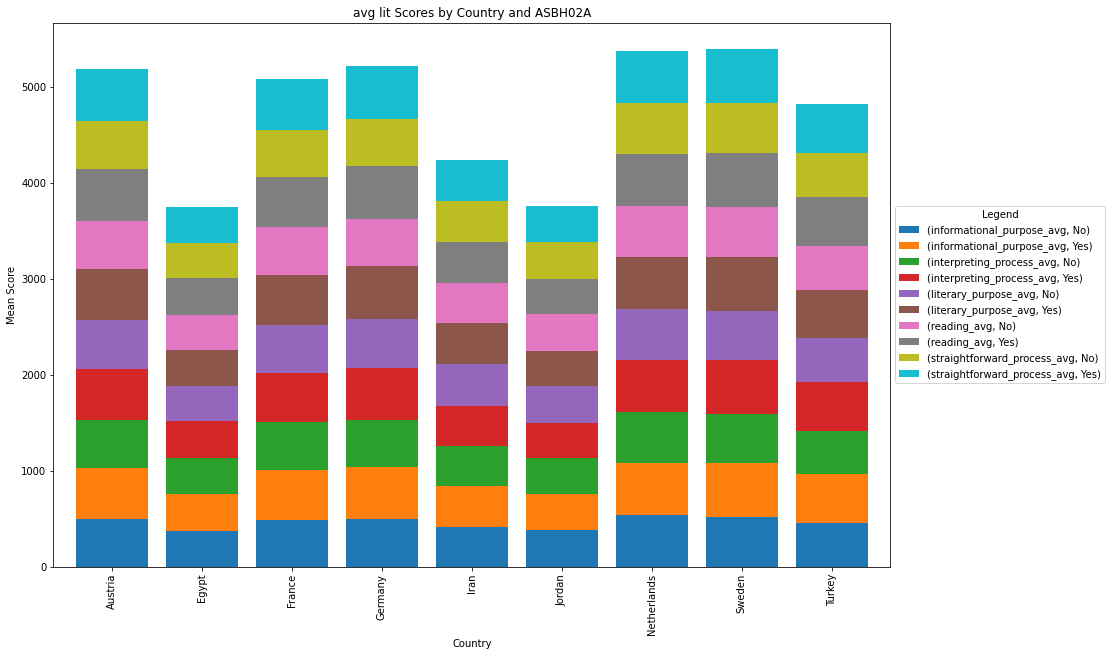

In [18]:
ax5 = pivot_unstacked.plot(kind='bar', figsize=(15,10), width=0.8, stacked=True)
plt.title('avg lit Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax5.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

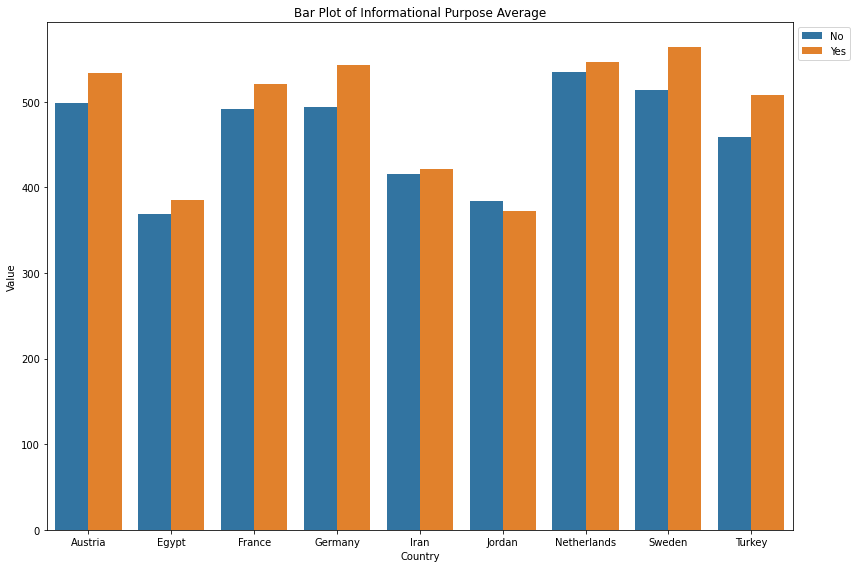

In [25]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Country', y='informational_purpose_avg', hue='ASBH02A', data=pivot_table)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Bar Plot of Informational Purpose Average')

# Show the plot
plt.tight_layout()
plt.show()

In [26]:
df_melted =  pivot_table.melt(id_vars=['Country', 'ASBH02A'], value_vars=averages, var_name='ValueType', value_name='Value')

In [27]:
df_melted

,Country,ASBH02A,ValueType,Value
0,Austria,No,reading_avg,501.137730
1,Austria,Yes,reading_avg,535.753998
2,Egypt,No,reading_avg,368.778085
3,Egypt,Yes,reading_avg,381.017793
4,France,No,reading_avg,495.189771
5,France,Yes,reading_avg,522.368422
6,Germany,No,reading_avg,496.504230
7,Germany,Yes,reading_avg,545.941246
8,Iran,No,reading_avg,424.286114
9,Iran,Yes,reading_avg,422.865906


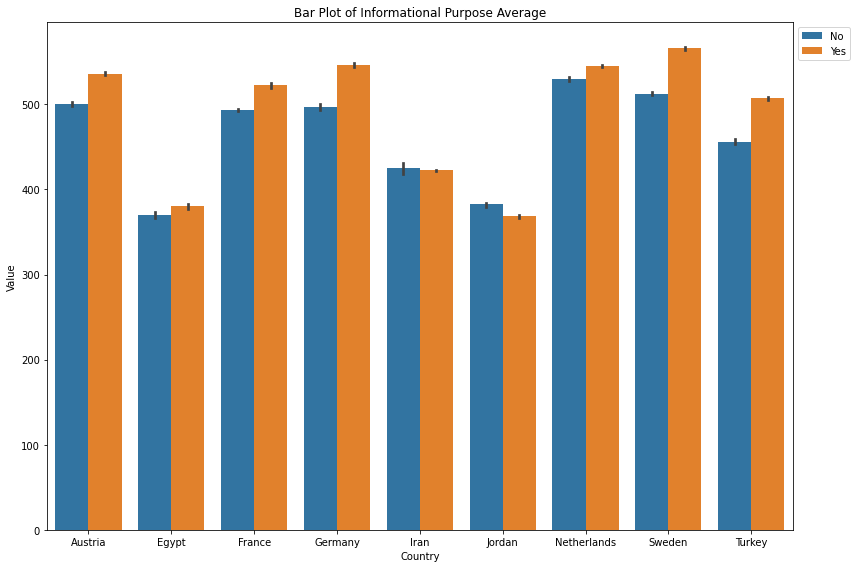

In [28]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(x='Country', y='Value', hue='ASBH02A', data=df_melted)

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Bar Plot of Informational Purpose Average')

# Show the plot
plt.tight_layout()
plt.show()